In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [598]:
columns = ['time', 'low', 'high', 'open', 'close', 'volume']
df = pd.read_json('dai_usdc_candles_24hr.json')
df.columns = columns
df.sort_values(by='time', inplace=True)

In [599]:
df['pct'] = df.close.pct_change()
df['log_returns'] = np.log(df.close) - np.log(df.close.shift(1))
df['date'] = pd.to_datetime(df['time'],unit='s')

In [600]:
df.head()

,time,low,high,open,close,volume,pct,log_returns,date
262,1545177600,1.00000,1.010000,1.000000,1.010000,10.00000,NaN,NaN,2018-12-19
261,1545264000,0.99500,1.006000,1.006000,1.000005,2964.43107,-0.009896,-0.009945,2018-12-20
260,1545350400,0.99777,1.000005,1.000005,1.000005,11854.76005,0.000000,0.000000,2018-12-21
259,1545436800,1.00000,1.000005,1.000004,1.000005,11122.83091,0.000000,0.000000,2018-12-22
258,1545523200,0.99800,1.000005,1.000004,0.998000,131548.60112,-0.002005,-0.002007,2018-12-23


In [601]:
NUM_DAYS = df.date.max() - df.date.min()
NUM_DAYS = NUM_DAYS.days
NUM_DAYS

262

In [602]:
vol = np.std(df['log_returns']) *np.sqrt(365/NUM_DAYS)
vol

0.006163910196227828

### Derivative Construction

Dai Peg Abs(x)^2

x is distance from $1 and DAI/USDC

In [603]:
x=np.arange(0,2.1, .005)
y = np.exp(9.2*abs(x-1))
# y = 100* abs(x-1)**2 + 1

In [604]:
y

array([9.89712906e+03, 9.45217356e+03, 9.02722238e+03, 8.62137618e+03,
       8.23377602e+03, 7.86360161e+03, 7.51006951e+03, 7.17243152e+03,
       6.84997307e+03, 6.54201172e+03, 6.24789571e+03, 5.96700258e+03,
       5.69873785e+03, 5.44253378e+03, 5.19784814e+03, 4.96416309e+03,
       4.74098406e+03, 4.52783872e+03, 4.32427597e+03, 4.12986501e+03,
       3.94419438e+03, 3.76687114e+03, 3.59752001e+03, 3.43578257e+03,
       3.28131652e+03, 3.13379497e+03, 2.99290570e+03, 2.85835053e+03,
       2.72984470e+03, 2.60711624e+03, 2.48990541e+03, 2.37796415e+03,
       2.27105554e+03, 2.16895334e+03, 2.07144146e+03, 1.97831351e+03,
       1.88937242e+03, 1.80442994e+03, 1.72330631e+03, 1.64582984e+03,
       1.57183656e+03, 1.50116988e+03, 1.43368022e+03, 1.36922477e+03,
       1.30766711e+03, 1.24887697e+03, 1.19272991e+03, 1.13910711e+03,
       1.08789509e+03, 1.03898546e+03, 9.92274716e+02, 9.47663991e+02,
       9.05058878e+02, 8.64369207e+02, 8.25508863e+02, 7.88395604e+02,
      

(0, 100)

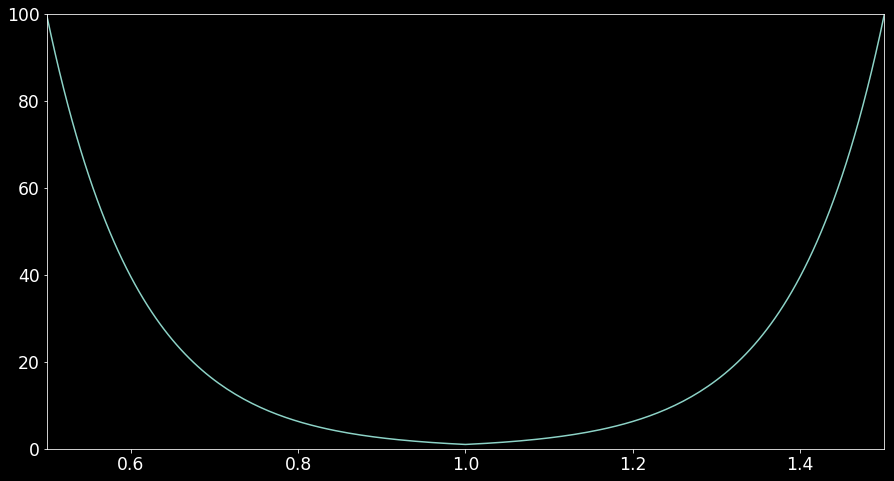

In [611]:
plt.figure(figsize=(15,8))
plt.plot(x,y)
# plt.yscale('log')
plt.xlim(.5,1.5)
plt.ylim(0,100)


In [612]:
df['blackswan_price'] = np.exp(9.2*abs(df.close-1)) #floor


def calc_blackswan(prices):
    y = np.exp(9.2*abs(prices-1))
    return y
#     y= 100* abs(prices-1)**2 + 1
#     return y



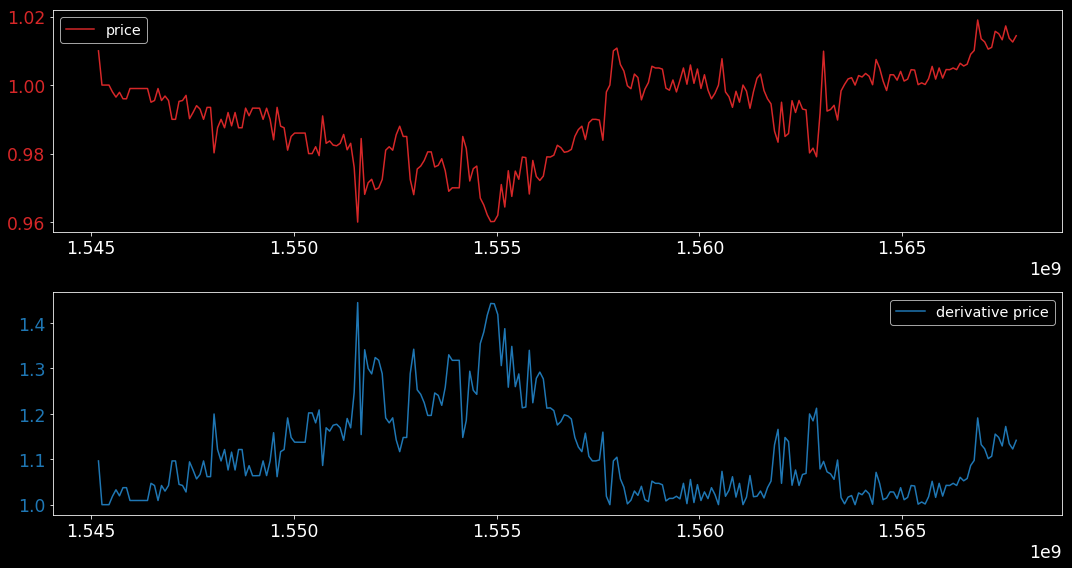

In [613]:

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(15)
fig.set_figheight(8)
color = 'tab:red'
axs[0].plot(df.time, df.close, color=color, label='price')
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].legend()
# ax2 = ax1.twinx() 

color = 'tab:blue'
axs[1].plot(df.time, df.blackswan_price, color=color, label='derivative price')
axs[1].tick_params(axis='y', labelcolor=color)

plt.legend()
fig.tight_layout() 
plt.show()


In [614]:
### project forward price from volatility
# https://pythonforfinance.net/2016/11/28/monte-carlo-simulation-in-python/

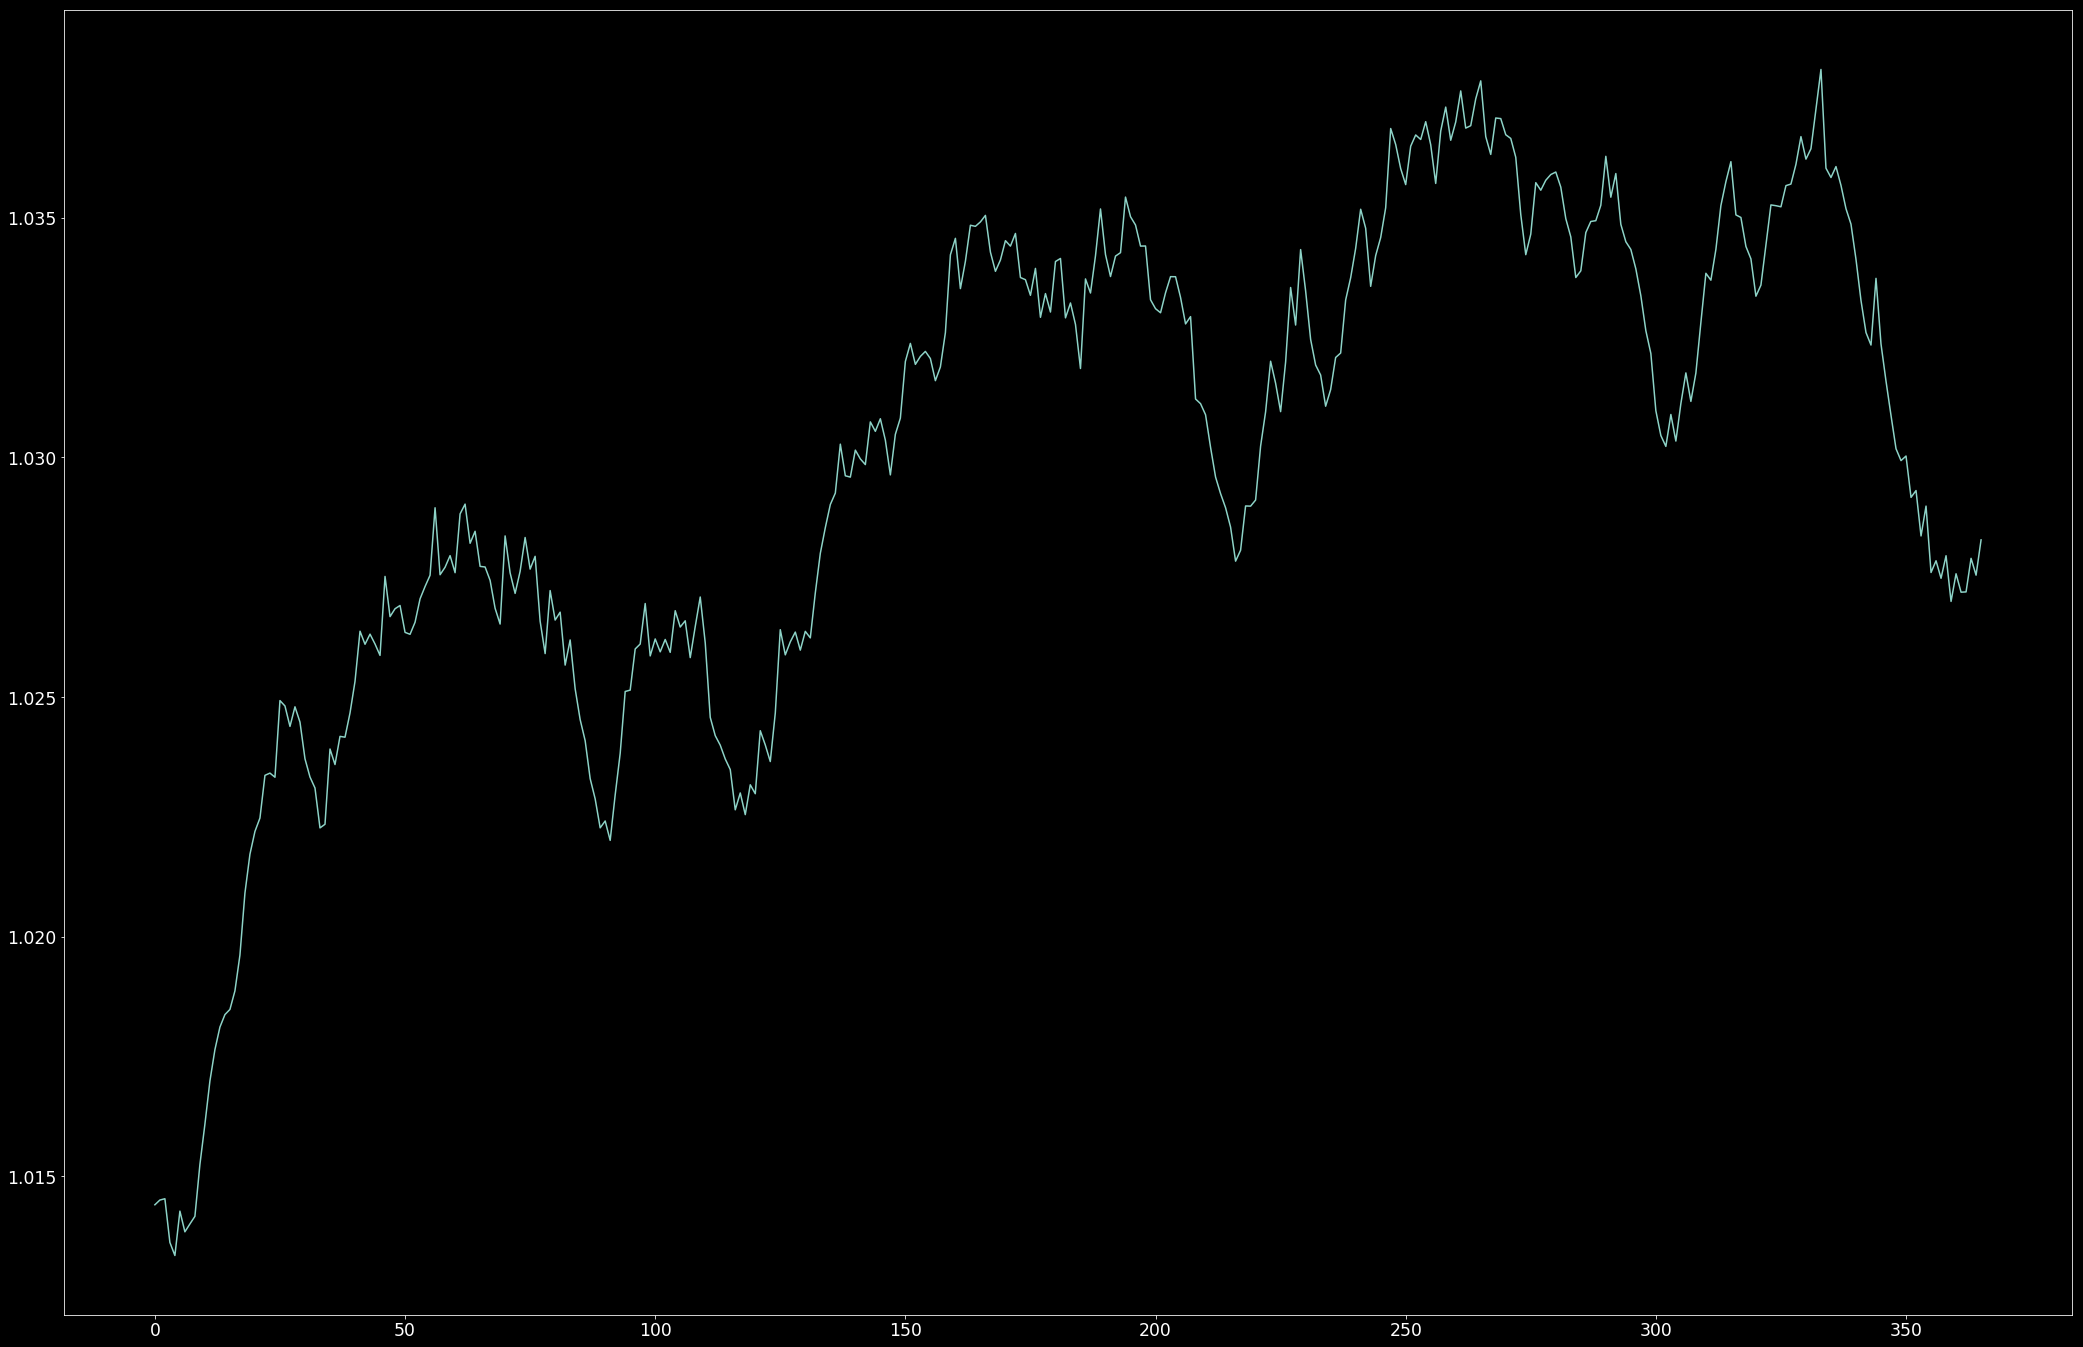

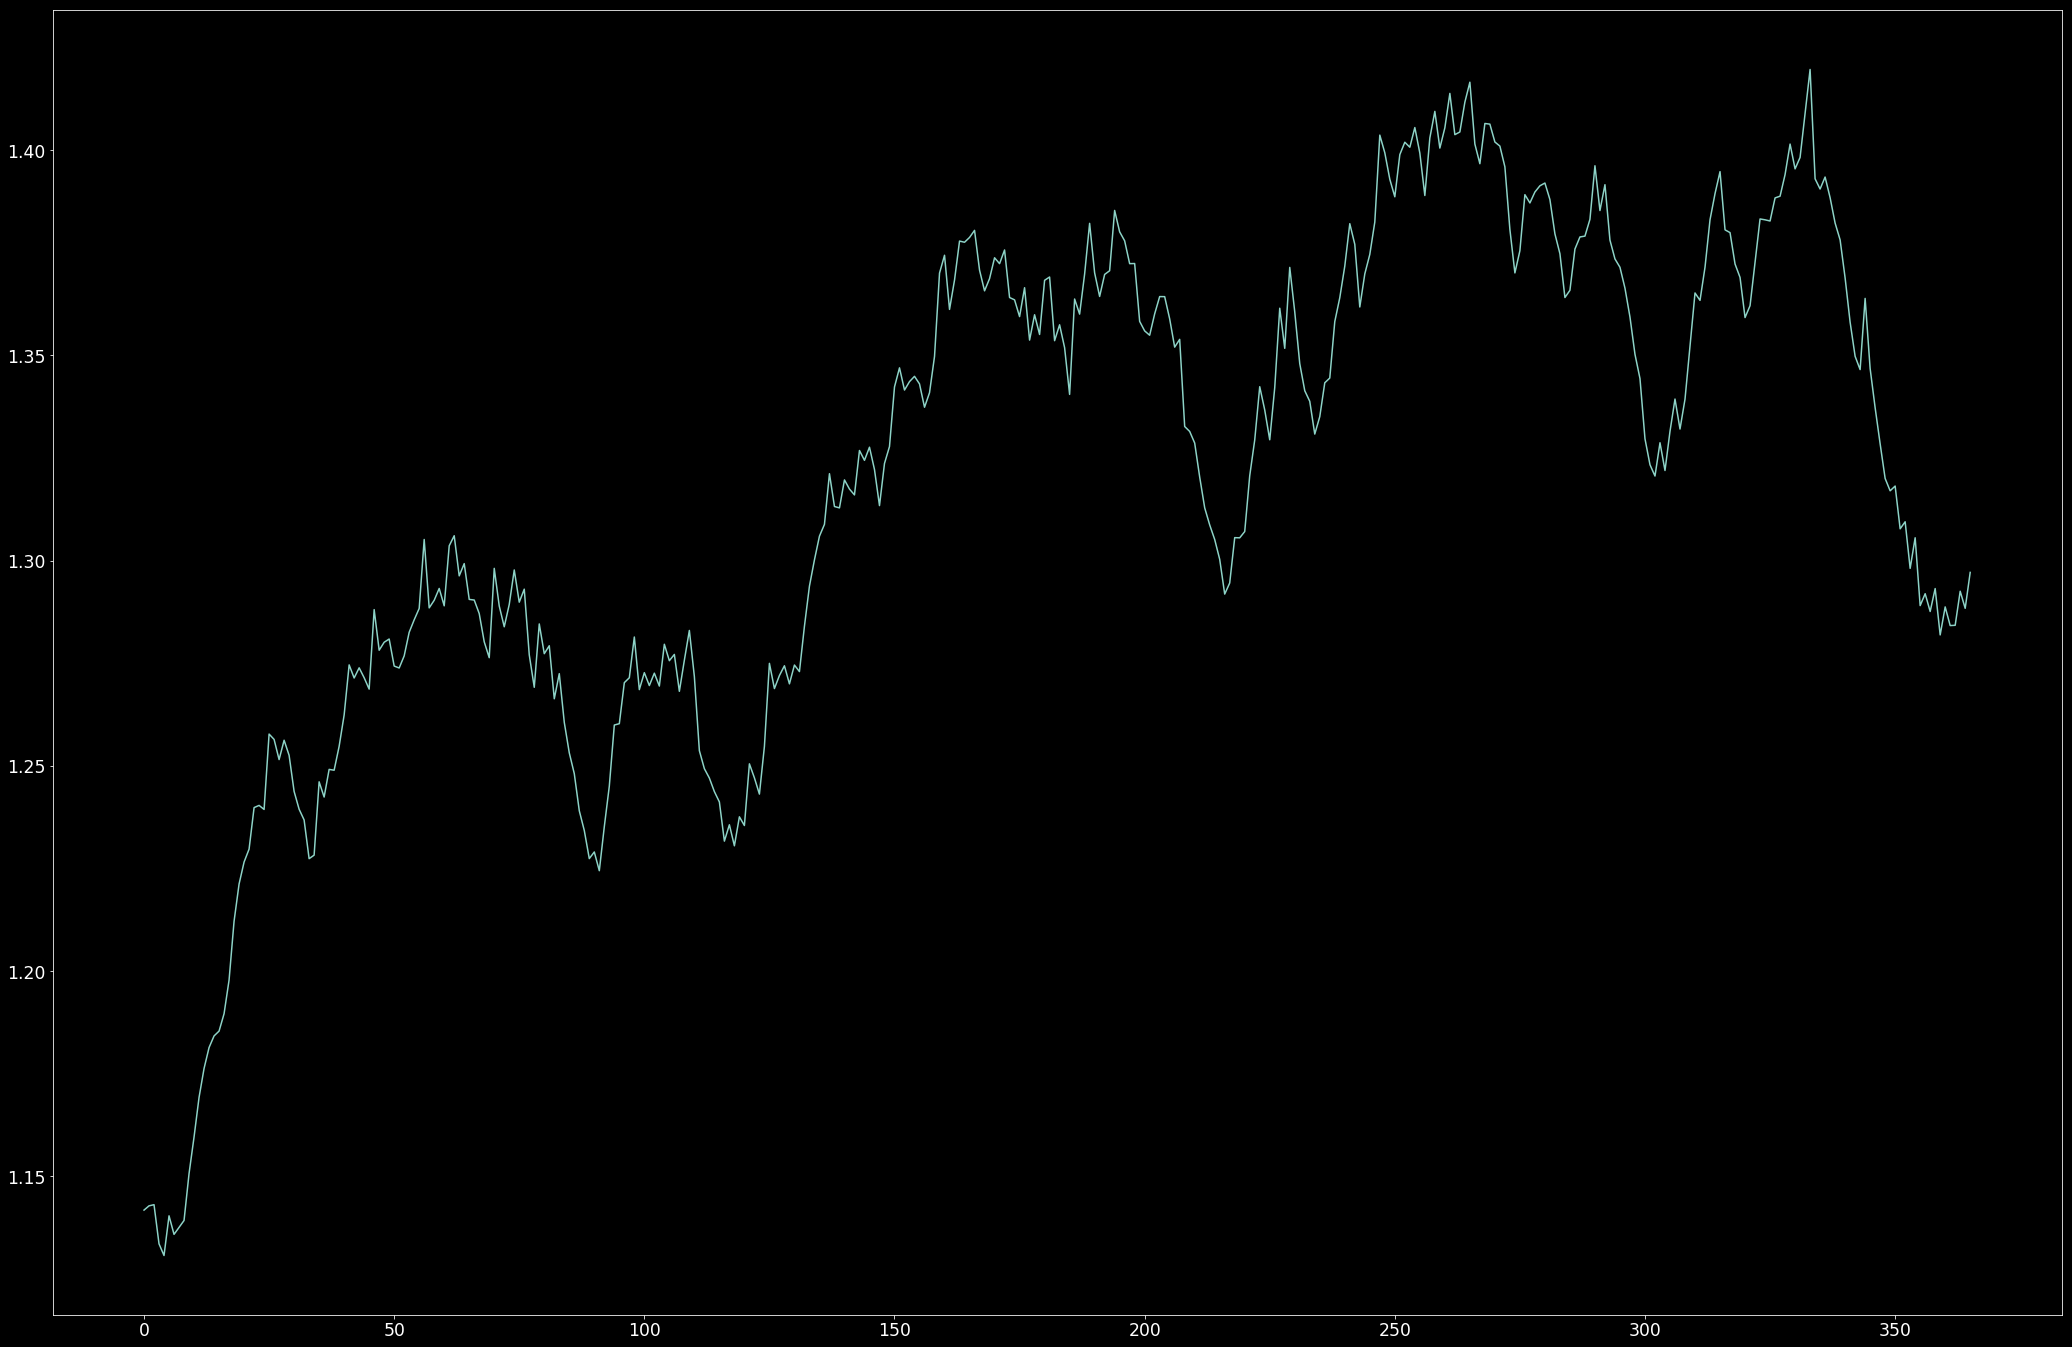

''

In [621]:
#Define Variables
S = df.close.values[-1] #starting stock price (i.e. last available real stock price)
T = 365 #Number of trading days
mu = 0 #Return
vol = vol*2 #Volatility


#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
    

#derivative prices
deriv_price_list = calc_blackswan(np.array(price_list))

#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.plot(deriv_price_list)
plt.show()
;

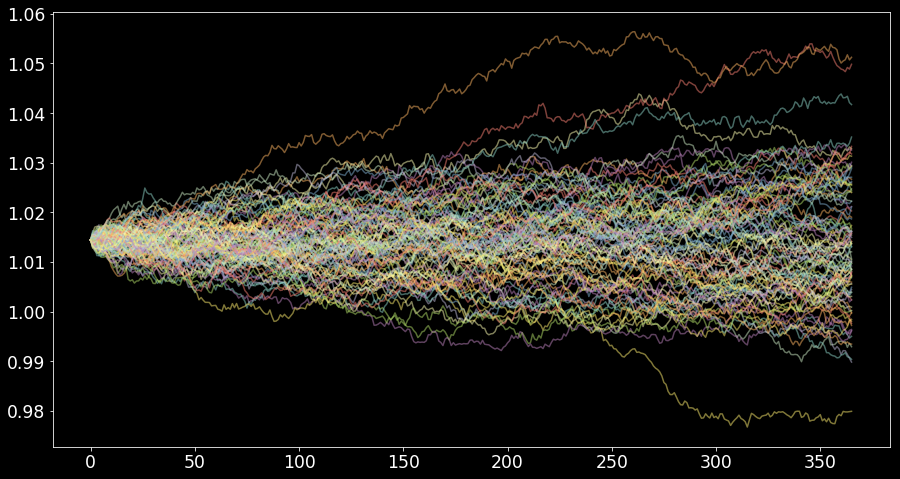

In [622]:
plt.figure(figsize=(15,8))
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        

    
    
    if i%10 ==0:
        plt.plot(price_list, alpha=.5)
        
#show the plot of multiple price series created above
plt.show()






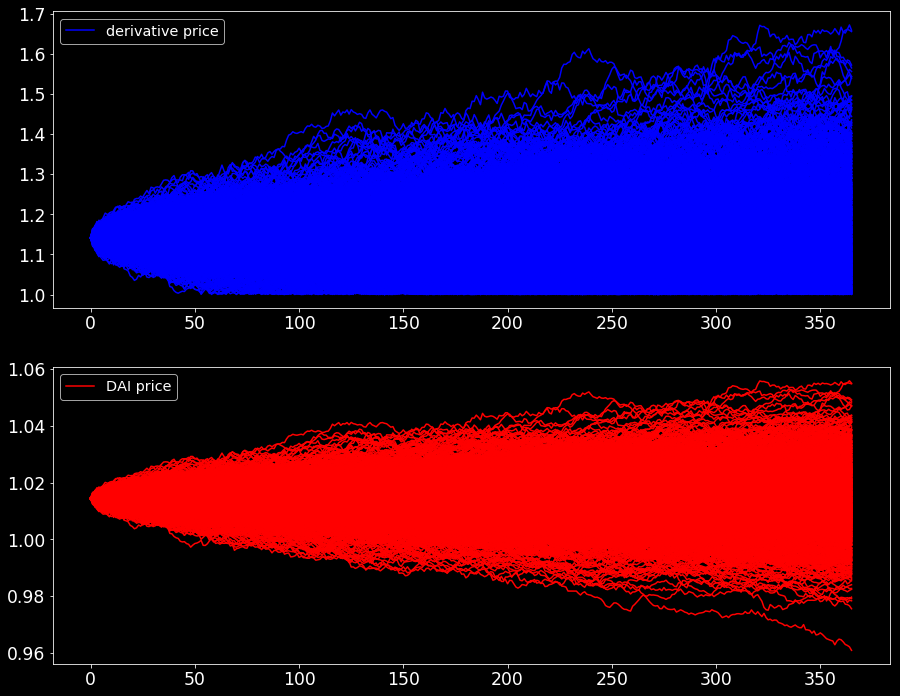

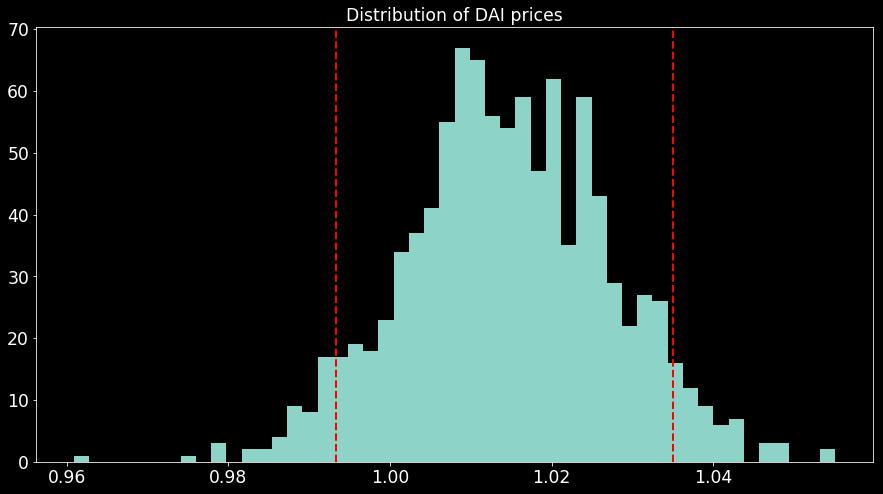

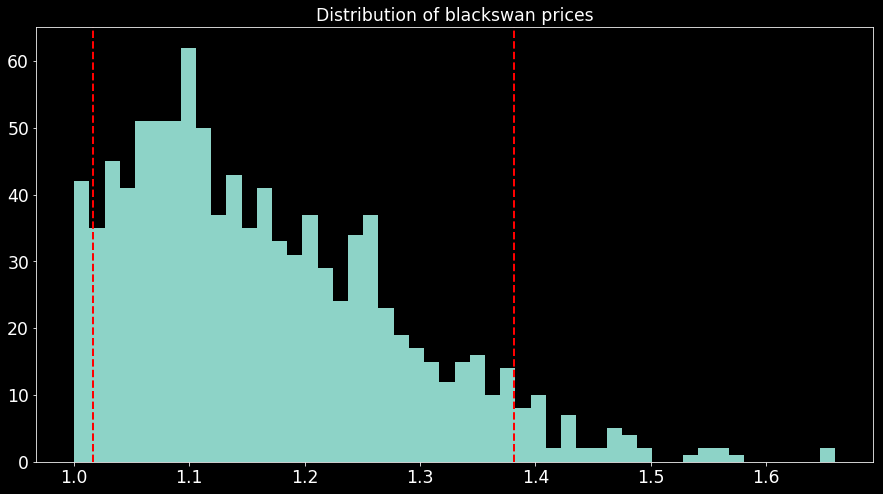

In [623]:
deriv_list_of_lists = []
result_list_of_lists = []

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(15)
fig.set_figheight(12)

#set up empty list to hold our ending values for each simulated price series
result = []
deriv_result = []
#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    
    #derivative prices
    deriv_price_list = calc_blackswan(np.array(price_list))
    
    #plot data from each individual run which we will plot at the end
    
    if i!=0:
        deriv_label=None
        dai_label=None
    else:
        deriv_label='derivative price'
        dai_label='DAI price'
    
    axs[0].plot(deriv_price_list, color='blue', alpha=1, label=deriv_label)
    axs[1].plot(price_list, color='red', alpha=1, label=dai_label)
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
    deriv_result.append(deriv_price_list[-1])
    
    #append the whole series
    deriv_list_of_lists.append(deriv_price_list)
    result_list_of_lists.append(price_list)
    
    
    
#show the plot of multiple price series created above

axs[0].legend()
axs[1].legend()
plt.show()

#create histogram of ending DAI values for our mutliple simulations
plt.figure(figsize=(15,8))
plt.hist(result,bins=50)
plt.title('Distribution of DAI prices')
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

#create histogram of ending blackswan values for our mutliple simulations
plt.figure(figsize=(15,8))
plt.hist(deriv_result,bins=50)
plt.title('Distribution of blackswan prices')
plt.axvline(np.percentile(deriv_result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(deriv_result,95), color='r', linestyle='dashed', linewidth=2)
# plt.yscale('log')
plt.show()


## Expected Value

In [625]:
np.mean(deriv_result)

1.1664084669912766

In [626]:
from matplotlib import animation, rc
import datetime

In [627]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (36, 24),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
plt.style.use('dark_background')

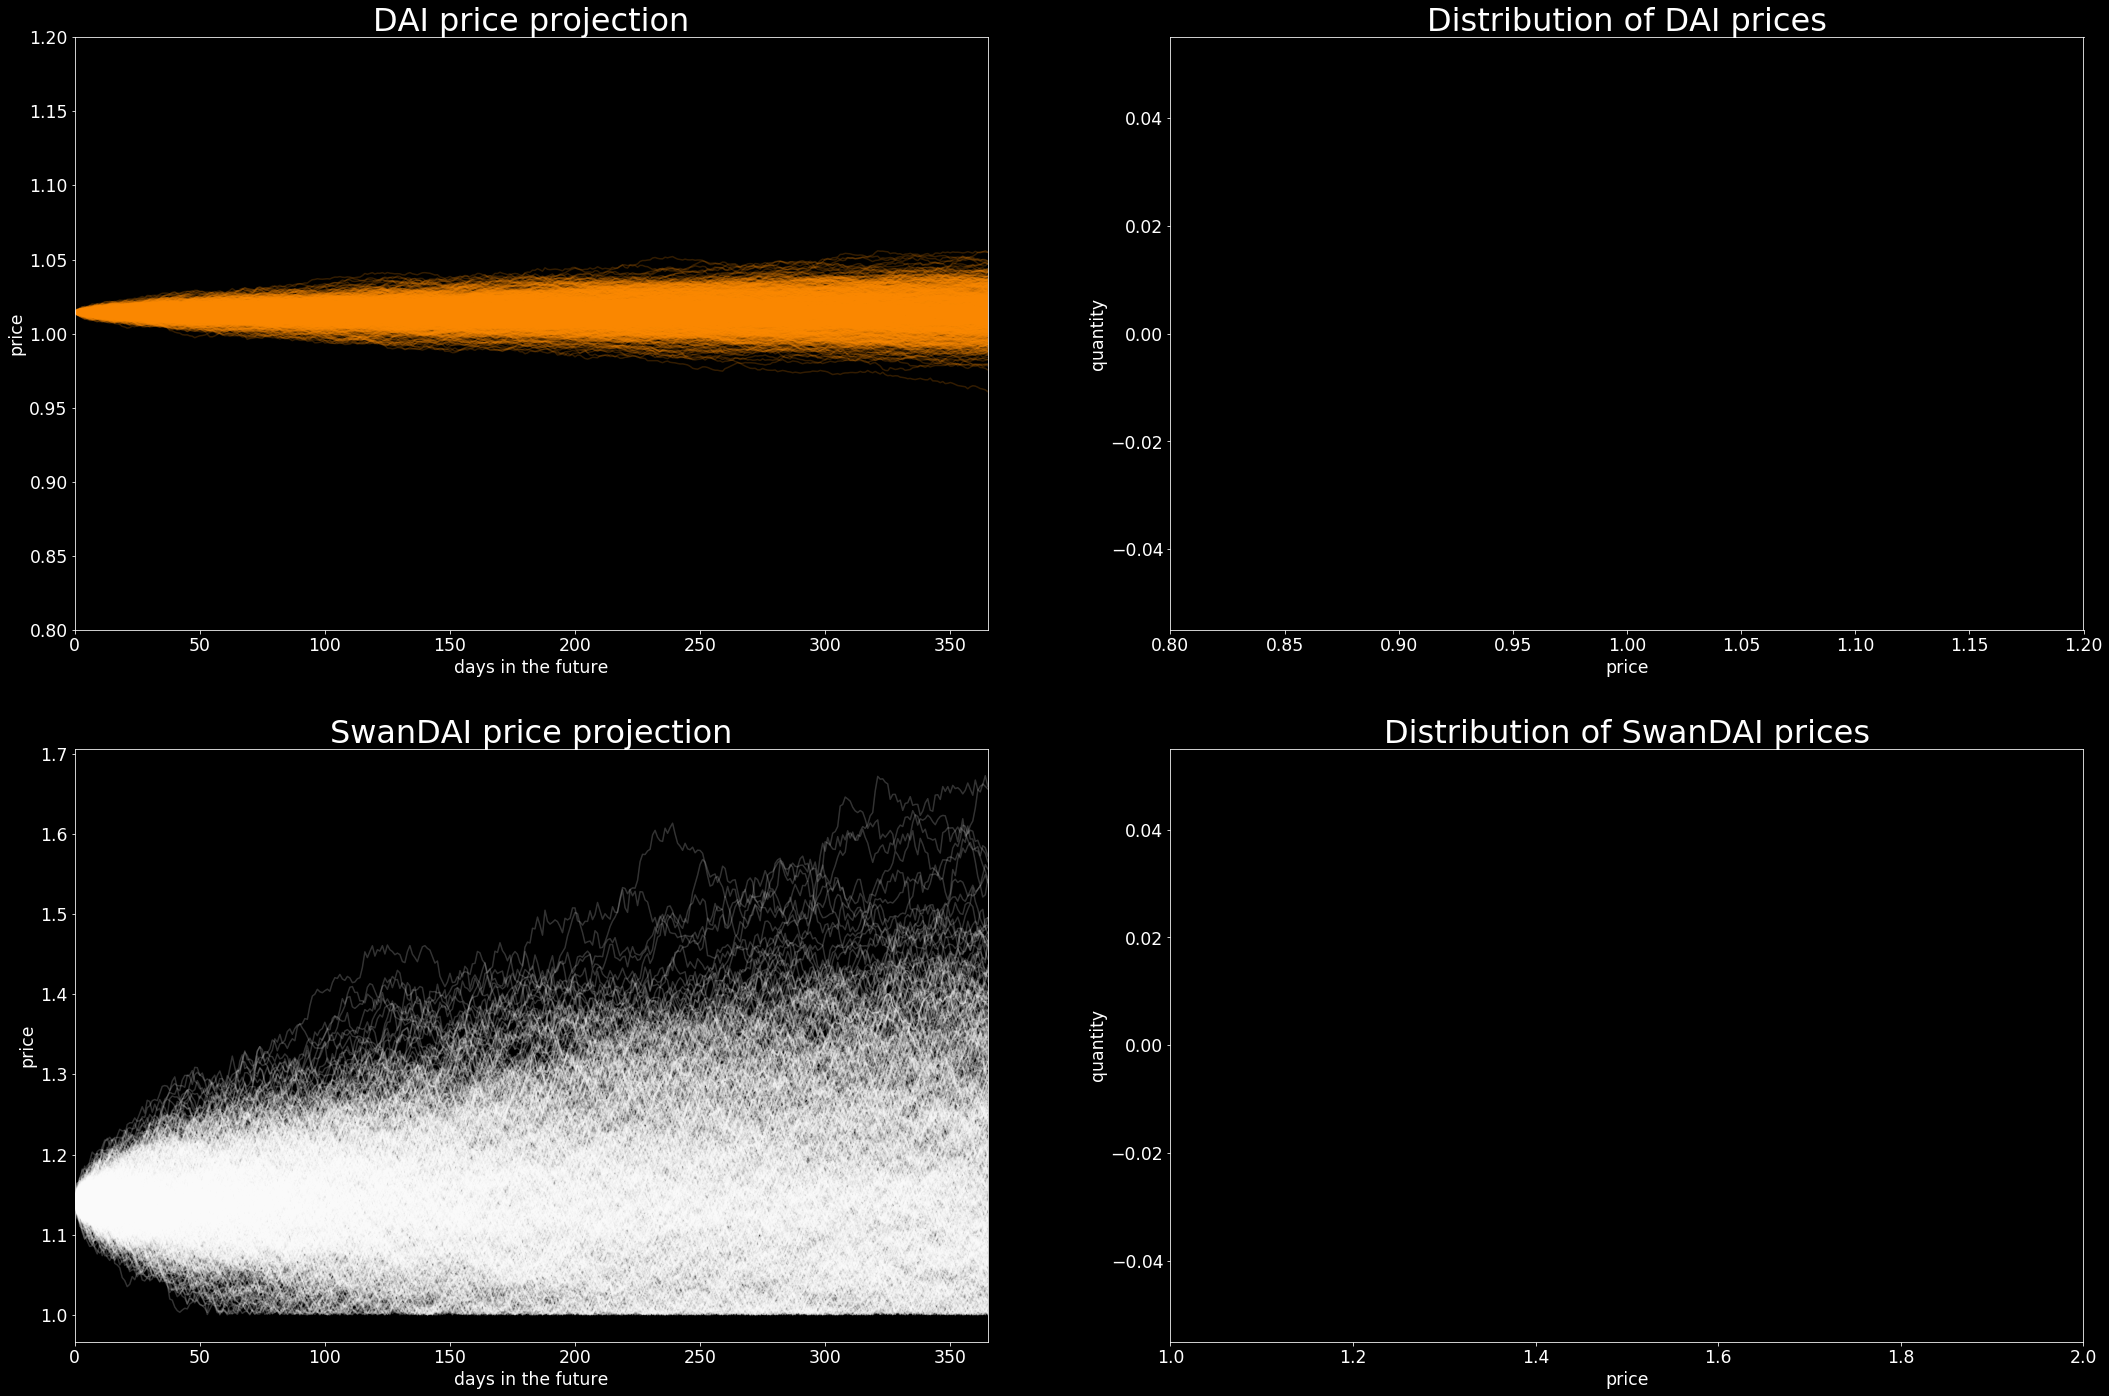

In [635]:
def animate(i):
    
#     ax.cla()


    if i!=0:
        deriv_label=None
        dai_label=None
    else:
        deriv_label='derivative price'
        dai_label='DAI price'
    
    
    ax = axs[0][0]
    ax.plot(result_list_of_lists[i], color='darkorange', alpha=.2, label=dai_label)
    ax.set_title('DAI price projection', fontsize=32)
    ax.set_xlabel('days in the future')
    ax.set_ylabel('price')
    ax = axs[1][0]
    ax.plot(deriv_list_of_lists[i], color='w', alpha=.2, label=deriv_label)
    ax.set_title('SwanDAI price projection', fontsize=32)
    ax.set_xlabel('days in the future')
    ax.set_ylabel('price')
    
    #distributions
    
    #create histogram of ending DAI values for our mutliple simulations
    
    ax = axs[0][1]
    
    ax.cla()
    to_plot = result[:i]
    ax.hist(to_plot,bins=50, color='darkorange', alpha=1)
#     ax.set_ylim(0,200)
    ax.set_xlim(.8,1.2)
    ax.set_title('Distribution of DAI prices', fontsize=32)
    ax.set_xlabel('price')
    ax.set_ylabel('quantity')
    if i>45:
        ax.axvline(np.percentile(to_plot,5), color='w', linestyle='dashed', linewidth=2)
        ax.axvline(np.percentile(to_plot,95), color='w', linestyle='dashed', linewidth=2)

    
    
    #create histogram of ending deriv values for our mutliple simulations

    ax = axs[1][1]
    ax.cla()
    to_plot = deriv_result[:i]
    ax.hist(to_plot,bins=50, color='w', alpha=.4)
    ax.set_title('Distribution of SwanDAI prices', fontsize=32)

#     ax.set_ylim(0,200)
    ax.set_xlim(1,2)
    ax.set_xlabel('price')
    ax.set_ylabel('quantity')
    if i>45:
        ax.axvline(np.percentile(to_plot,5), color='w', linestyle='dashed', linewidth=2)
        ax.axvline(np.percentile(to_plot,95), color='w', linestyle='dashed', linewidth=2)

    
    
fig, axs = plt.subplots(nrows=2, ncols=2)

fig.set_figwidth(36)
fig.set_figheight(24)

ax = axs[0][0]
ax.set_ylim(.8,1.2)
ax.set_xlim(0,365)


ax = axs[1][0]
# ax.set_ylim(1,5)
ax.set_xlim(0,365)




anim = animation.FuncAnimation(fig, animate,
                               frames=1000, interval=1)



anim.save('viz.mp4', fps=45, extra_args=['-vcodec', 'libx264'])

